In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('Housing_data.csv')
raw_data.head(3)

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,serviced_price,location_rank,new_price,exec_flag,locationbed,location,spec_location,description
0,850000.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1300000.0,1840000.0,31.0,1840000.0,1.0,gbagada3,gbagada,sosanya soluyi gbagada lagos,3 bedroom Flat / Apartment for rent Sosanya So...
1,650000.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,400000.0,560000.0,9.0,560000.0,1.0,gbagada1,gbagada,millenuim ups gbagada lagos,1 bedroom mini flat Mini flat Flat / Apartment...
2,600000.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,800000.0,1060000.0,26.0,1060000.0,1.0,gbagada2,gbagada,alapere gbagada lagos,"2bed at Alapere, all rooms ensuit ... ..."


# Exploratory Data Analysis

In [3]:
raw_data.describe()

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,serviced_price,location_rank,new_price,exec_flag
count,4.377000e+03,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4.377000e+03,4.377000e+03,4377.000000,4.377000e+03,4377.000000
mean,2.204272e+06,2.714645,2.500114,2.980809,0.588302,0.303404,0.534384,0.405529,2.150993e+06,2.898988e+06,35.064428,2.898988e+06,2.110578
std,1.788746e+06,1.164742,1.437791,1.710703,0.492197,0.459781,0.498873,0.491050,1.575584e+06,2.022732e+06,15.869352,2.022732e+06,1.126229
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+05,1.500000e+05,2.000000,1.500000e+05,1.000000
25%,8.000000e+05,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+05,1.060000e+06,25.000000,1.060000e+06,1.000000
50%,1.800000e+06,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.800000e+06,2.500000e+06,35.000000,2.500000e+06,2.000000
75%,3.000000e+06,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.500000e+06,4.500000e+06,52.000000,4.500000e+06,3.000000
max,8.000000e+06,5.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+06,8.000000e+06,67.000000,8.000000e+06,4.000000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           4377 non-null   float64
 1   bedrooms        4377 non-null   float64
 2   bathrooms       4377 non-null   float64
 3   toilets         4377 non-null   float64
 4   estate_flag     4377 non-null   float64
 5   terrace_flag    4377 non-null   float64
 6   new_flag        4377 non-null   float64
 7   serviced_flag   4377 non-null   float64
 8   estate_price    4377 non-null   float64
 9   serviced_price  4377 non-null   float64
 10  location_rank   4377 non-null   float64
 11  new_price       4377 non-null   float64
 12  exec_flag       4377 non-null   float64
 13  locationbed     4377 non-null   object 
 14  location        4377 non-null   object 
 15  spec_location   4377 non-null   object 
 16  description     4377 non-null   object 
dtypes: float64(13), object(4)
memory 

In [5]:
(raw_data['serviced_price'] == raw_data['new_price']).mean()

1.0

In [6]:
raw_data.drop(['new_price', 'locationbed', 'location', 'spec_location', 'description'], axis=1, inplace=True)

In [7]:
raw_data.head(3)

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,serviced_price,location_rank,exec_flag
0,850000.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1300000.0,1840000.0,31.0,1.0
1,650000.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,400000.0,560000.0,9.0,1.0
2,600000.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,800000.0,1060000.0,26.0,1.0


In [8]:
raw_data.corr()

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,serviced_price,location_rank,exec_flag
price,1.000000,0.657021,0.447772,0.461837,0.249855,0.697134,0.163079,0.349731,0.821092,0.816925,0.792509,0.694552
bedrooms,0.657021,1.000000,0.675825,0.666456,0.011875,0.625976,0.051302,0.071721,0.745899,0.732251,0.829569,0.428395
bathrooms,0.447772,0.675825,1.000000,0.945059,0.028160,0.426519,0.156822,0.090400,0.504016,0.494629,0.555994,0.284639
toilets,0.461837,0.666456,0.945059,1.000000,0.041909,0.413571,0.159559,0.135490,0.501710,0.496248,0.566172,0.320637
estate_flag,0.249855,0.011875,0.028160,0.041909,1.000000,0.156250,0.214016,0.257895,-0.007466,-0.005909,0.005035,0.223545
terrace_flag,0.697134,0.625976,0.426519,0.413571,0.156250,1.000000,0.128857,0.158359,0.642534,0.622621,0.624647,0.500956
new_flag,0.163079,0.051302,0.156822,0.159559,0.214016,0.128857,1.000000,0.253236,-0.002975,-0.009811,-0.004003,0.105489
serviced_flag,0.349731,0.071721,0.090400,0.135490,0.257895,0.158359,0.253236,1.000000,0.169583,0.176223,0.194179,0.373014
estate_price,0.821092,0.745899,0.504016,0.501710,-0.007466,0.642534,-0.002975,0.169583,1.000000,0.991465,0.934464,0.552332
serviced_price,0.816925,0.732251,0.494629,0.496248,-0.005909,0.622621,-0.009811,0.176223,0.991465,1.000000,0.938154,0.566417


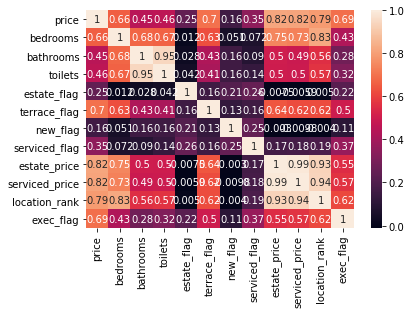

In [9]:
sns.heatmap(raw_data.corr(), annot=True);

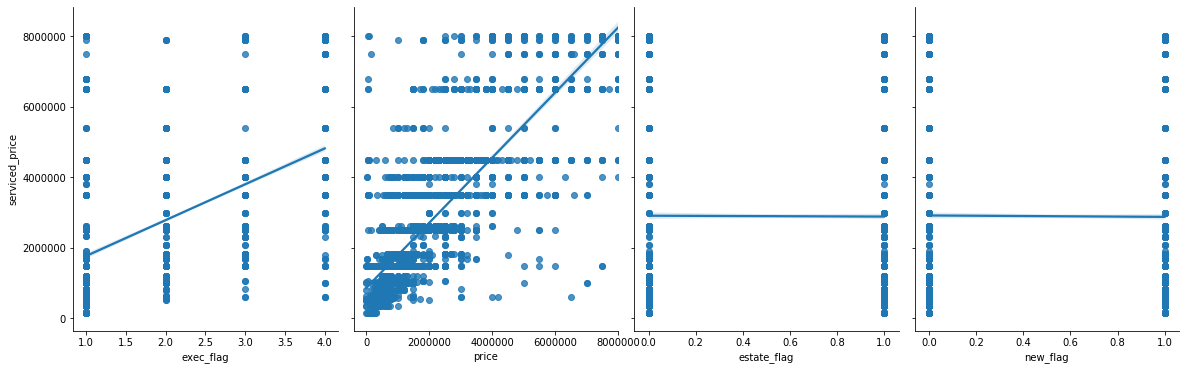

In [10]:
sns.pairplot(raw_data, x_vars=['exec_flag', 'price', 'estate_flag', 'new_flag'], y_vars=['serviced_price'], height=5, aspect=0.8, kind='reg');

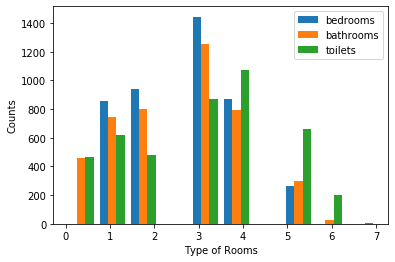

In [11]:
plt.hist([raw_data['bedrooms'], raw_data['bathrooms'], raw_data['toilets']])
plt.legend(['bedrooms', 'bathrooms', 'toilets'])
plt.xlabel('Type of Rooms')
plt.ylabel('Counts')
plt.show();

# Modeling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
X = raw_data.drop('serviced_price', axis=1)
y = raw_data['serviced_price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = lin_reg.predict(X_test)

In [17]:
y_pred[:5]

array([ 839300.08256692, 4585694.34414839, 6430942.48624839,
       6463666.68293716, 1156996.39489458])

In [18]:
y_test.to_numpy()[:5]

array([ 800000., 4500000., 6500000., 6500000., 1000000.])

In [19]:
lin_reg.score(X_test, y_test)

0.9827661326364915

In [20]:
lin_reg.score(X_train, y_train)

0.9859266214244682

In [21]:
mean_absolute_error(y_test, y_pred)

136321.75469956125